# Lab 11: Radioactive Decay

Shreya Parjan
12/15/18

In [38]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats
import scipy.optimize
import scipy.misc

In [39]:
lData = np.loadtxt('part1lifetime.txt')
t = lData [:,0]
rcount = lData [:,1]

radData = np.loadtxt ('radwsample.txt')
t2 = radData [:,0]
r2 = radData [:,1]

noradData = np.loadtxt ('radnosample.txt')
t1 = noradData [:,0]
r1 = noradData [:,1]

# Part 1

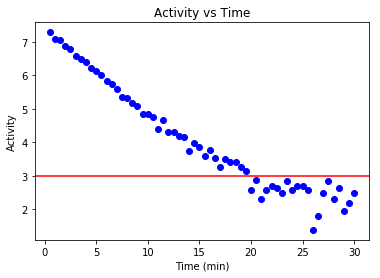

[ 4.29029288  4.0749632   4.06987413  3.86797441  3.79122146  3.58202514
  3.47850964  3.41345896  3.22653667  3.13339804  3.01126717  2.83481074
  2.73979291  2.59098698  2.36129217  2.31811999  2.170484    2.08140436
  1.83628191  1.8598124   1.77068462  1.39444915  1.66343909  1.30406509
  1.30406509  1.20469262  1.15888308  0.73766962  0.97029191  0.87120101
  0.58351894  0.76120012  0.52636052  0.25809654  0.49650756  0.40119738
  0.40119738  0.25809654  0.13549422 -0.43505064 -0.10962824 -0.69741491
 -0.43505064 -0.2919498  -0.36094267 -0.51509335 -0.16678666 -0.43505064
 -0.2919498  -0.2919498  -0.43505064 -1.61370564 -1.20824053 -0.51509335
 -0.16678666 -0.69741491 -0.36094267 -1.05408985 -0.80277542 -0.51509335]


Text(0,0.5,'Activity')

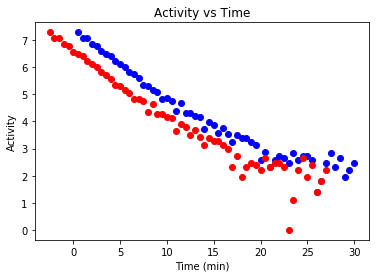

In [40]:
plt.plot (t, np.log(rcount), 'bo')
plt.axhline(y = 3, color = 'r')
plt.title ('Activity vs Time')
plt.xlabel ('Time (min)')
plt.ylabel ('Activity')
plt.show()

rcount2 = lData [:,1] - 3
t2 = lData[:,0]-3
print (np.log(rcount) - 3)

plt.plot (t, np.log(rcount), 'bo')
plt.plot (t2, np.log(rcount2), 'ro')
plt.title ('Activity vs Time')
plt.xlabel ('Time (min)')
plt.ylabel ('Activity')

In [41]:
rcountshort = rcount [0:39]
tshort = t[0:39] 
print(np.log(rcountshort))

[7.29029288 7.0749632  7.06987413 6.86797441 6.79122146 6.58202514
 6.47850964 6.41345896 6.22653667 6.13339804 6.01126717 5.83481074
 5.73979291 5.59098698 5.36129217 5.31811999 5.170484   5.08140436
 4.83628191 4.8598124  4.77068462 4.39444915 4.66343909 4.30406509
 4.30406509 4.20469262 4.15888308 3.73766962 3.97029191 3.87120101
 3.58351894 3.76120012 3.52636052 3.25809654 3.49650756 3.40119738
 3.40119738 3.25809654 3.13549422]


In [42]:
def straight_line_model(x,A,B):
    return A+B*x

popt,pcov = scipy.optimize.curve_fit(straight_line_model, tshort[0:40], np.log(rcountshort[0:40]))
print('best-fit parameters:', popt)
print('covariance matrix:')
print(pcov)

popt_uncertainties = np.sqrt(np.diag(pcov))
print('uncertainties:', popt_uncertainties)

best-fit parameters: [ 7.20006443 -0.22274076]
covariance matrix:
[[ 2.98649889e-03 -2.26822701e-04]
 [-2.26822701e-04  2.26822702e-05]]
uncertainties: [0.05464887 0.00476259]


Text(0,0.5,'Activity')

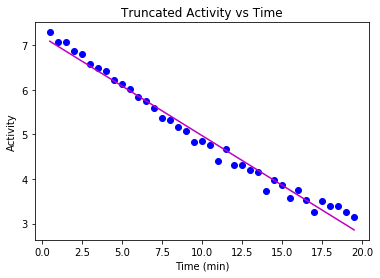

In [43]:
best_fit_line = straight_line_model(tshort[0:40], popt[0], popt[1])
plt.plot (tshort, np.log(rcountshort), 'bo')
plt.plot (tshort, best_fit_line, 'm')

plt.title ('Truncated Activity vs Time')
plt.xlabel ('Time (min)')
plt.ylabel ('Activity')

In [44]:
htime = (np.log(2))/(-popt[1])
print("halftime in minutes = ", htime)
htimeUncert = (htime*popt_uncertainties[1])/-popt[1]
print ("halftime uncertainty = ", htimeUncert)


halftime in minutes =  3.1119009899724244
halftime uncertainty =  0.0665379382841684


1. From my results, the halflife is 3.11 min +/- .07 min which is slightly higher than the true value of 2.55 min.
2. Without subtracting the background radiation, the line is less linear and has a smaller slope. This means that the halflife time is bigger.

# Part 2

## Low Activity

In [46]:
nu1 = bins
mu1 = np.mean(r1)
P = mu1**nu1*np.exp(-mu1)/scipy.special.factorial(nu1)
stdP = np.sqrt(mu1)
hist1 = np.histogram(r1, bins = np.arange(r1.max() + 2))

histnorm = hist1 [0] / 500
print (histnorm)
print(np.sum(histnorm))
print(P*1)
bins1 = np.arange(4)

P = mu1**bins1 /scipy.special.factorial(bins1)*np.exp(-mu1)
print(sum(P))
Gaussian = np.exp(-(bins1 - mu1)**2/(2*stdP**2)*1/stdP*np.sqrt(2*np.pi))

[0.7   0.254 0.042 0.002]
0.998
[7.08440376e-01 2.44191873e-01 4.20851725e-02 4.83543732e-03
 4.16680972e-04]
0.9995528588227083


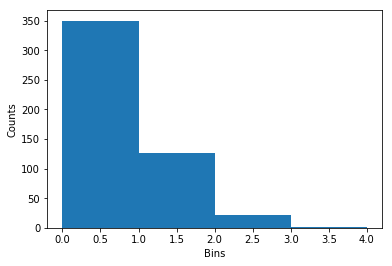

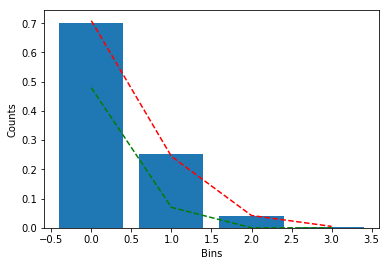

In [54]:
bins = np.arange(r1.max() +2)
plt.hist(r1, bins = np.arange(r1.max() +2))
plt.xlabel ('Bins')
plt.ylabel ('Counts')
plt.show()

plt.bar(bins1, histnorm)
plt.plot(bins1, P,'r--')
plt.plot(bins1, Gaussian, 'g--')
plt.xlabel ('Bins')
plt.ylabel ('Counts')
plt.show()

## High Activity

In [48]:
hist2, hist2bins = np.histogram(r2, bins = 10)
bins2 = hist2bins[:-1]
hist2norm = hist2/len(r2)

mu2 = np.mean(r2)
binWidth = bins2[1] - bins2[0]
P2 = mu2**bins2/scipy.special.factorial(bins2)*np.exp(-mu2)*binWidth
sigma_p = np.sqrt(mu2)
Gaussian2 = np.exp(-(bins2 - mu2)**2/(2*sigma_p**2))/(sigma_p*np.sqrt(2*np.pi))*binWidth
#print(sum(Gaussian2))

stdG = np.std(r1)
print (stdP)
print (stdG)
print(" ")
sigmaP = np.sqrt(mu2)
sigmaG = np.std(r2)

print (sigmaP)
print (sigmaG)

0.5871025283181082
0.5675129916564136
 
5.389070807508162
5.403204762763165


Text(0,0.5,'Counts')

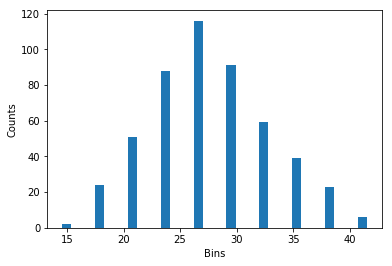

In [49]:
plt.bar (bins2, hist2)
plt.xlabel ('Bins')
plt.ylabel ('Counts')

Text(0,0.5,'Counts')

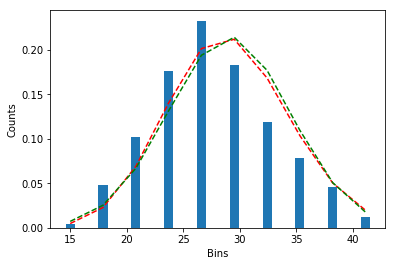

In [50]:
plt.bar (bins2, hist2norm)
plt.plot(bins2, P2,'r--')
plt.plot(bins2, Gaussian2, 'g--')
plt.xlabel ('Bins')
plt.ylabel ('Counts')

3. The Poisson and the Gaussian both fit the high activity data but not the low activity data because it is not symmetrical.

4. This appears to be true because the standard deviations for each distribution are close. High activity: sigma p = 5.39, sigma g = 5.40. Low activity: sigma p was .59 and the sigma g was .57.